# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Fuad Alfaridzi
- **Email:** Alfaridzifuad@gmail.com
- **ID Dicoding:** fuad_alfaridzi

## Menentukan Pertanyaan Bisnis

- The Most Recent Day When a Customer Rented a Bike
- Season with the Most Rented Bikes
- How Does Weather Affect Bike Rentals?

## Import Semua Packages/Library yang Digunakan

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [23]:
day_df = pd.read_csv("data/day.csv")
day_df.head()



,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [24]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [25]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [26]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [27]:
day_df.isna().sum() #tidak ada data yang hilang

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [28]:
hour_df.info

<bound method DataFrame.info of        instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0

In [29]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [30]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Merge 2 dataset

In [31]:
# Merge the datasets on relevant columns: 'dteday', 'season', 'yr', 'mnth', and 'holiday'
merged_df = pd.merge(hour_df, day_df, on=['dteday', 'season', 'yr', 'mnth', 'holiday'], suffixes=('_hour', '_day'))

# Display the first few rows of the merged dataset to verify
merged_df.head()

,instant_hour,dteday,season,yr,mnth,hr,holiday,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


### Cleaning Data

In [32]:
# All datasets have been assessed and none have duplicate data or missing values

## Exploratory Data Analysis (EDA)

### Explore merged file

In [33]:
merged_df.to_csv('merged_file.csv', index=False)

In [34]:
merged_df.sample(5)

,instant_hour,dteday,season,yr,mnth,hr,holiday,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
17252,17253,2012-12-26,1,1,12,17,0,3,1,3,...,3,1,3,0.243333,0.220333,0.823333,0.316546,9,432,441
8839,8840,2012-01-09,1,1,1,3,0,1,1,1,...,1,1,2,0.224167,0.247479,0.701667,0.098900,106,2270,2376
3837,3838,2011-06-13,2,0,6,19,0,1,1,1,...,1,1,1,0.635000,0.601654,0.494583,0.305350,863,4157,5020
16006,16007,2012-11-04,4,1,11,15,0,0,0,1,...,0,0,1,0.325833,0.329538,0.532917,0.179108,1201,3906,5107
6104,6105,2011-09-16,3,0,9,22,0,5,1,1,...,5,1,2,0.469167,0.461475,0.590417,0.164183,742,4018,4760


In [35]:
merged_df.describe(include="all")

,instant_hour,dteday,season,yr,mnth,hr,holiday,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,...,3.003683,0.682721,1.391680,0.496987,0.475775,0.627229,0.190098,854.339720,3679.353242,4533.692963
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,...,2.005771,0.465431,0.540501,0.182445,0.162426,0.141779,0.077204,685.686754,1544.953518,1917.376947
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.340000,0.338363,0.520000,0.134950,318.000000,2545.000000,3214.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,...,3.000000,1.000000,1.000000,0.502500,0.490122,0.625833,0.180967,724.000000,3681.000000,4563.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,...,5.000000,1.000000,2.000000,0.655833,0.610488,0.729583,0.233204,1100.000000,4801.000000,5986.000000


In [36]:
merged_df.dteday.is_unique

False

In [37]:
merged_df.dteday.duplicated

<bound method Series.duplicated of 0        2011-01-01
1        2011-01-01
2        2011-01-01
3        2011-01-01
4        2011-01-01
            ...    
17374    2012-12-31
17375    2012-12-31
17376    2012-12-31
17377    2012-12-31
17378    2012-12-31
Name: dteday, Length: 17379, dtype: object>

#### Advanced Analysis Techniques

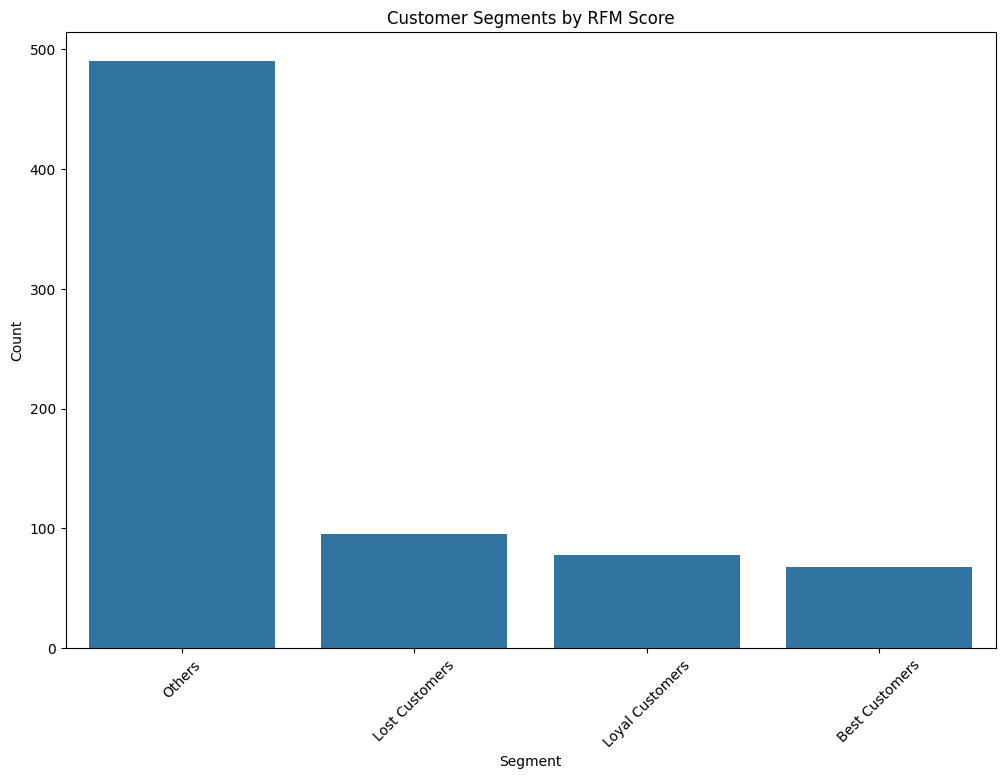

,dteday,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
0,2011-01-01,730,985,985,1,1,1,111,Lost Customers
1,2011-01-02,729,801,801,1,1,1,111,Lost Customers
2,2011-01-03,728,1349,1349,1,1,1,111,Lost Customers
3,2011-01-04,727,1562,1562,1,1,1,111,Lost Customers
4,2011-01-05,726,1600,1600,1,1,1,111,Lost Customers


In [47]:
import datetime as dt

# Load the dataset
day_data = pd.read_csv('data/day.csv')

# Calculate Recency (days since the last rental)
day_data['dteday'] = pd.to_datetime(day_data['dteday'])
last_date = day_data['dteday'].max()
recency_data = day_data.groupby('dteday').sum().reset_index()
recency_data['Recency'] = (last_date - recency_data['dteday']).dt.days

# Calculate Frequency (number of transactions)
frequency_data = day_data.groupby('dteday').sum().reset_index()
frequency_data['Frequency'] = frequency_data['cnt']

# Calculate Monetary (total amount spent)
monetary_data = day_data.groupby('dteday').sum().reset_index()
monetary_data['Monetary'] = monetary_data['cnt']

# Combine Recency, Frequency, and Monetary data
rfm_data = recency_data[['dteday', 'Recency']].copy()
rfm_data = rfm_data.merge(frequency_data[['dteday', 'Frequency']], on='dteday')
rfm_data = rfm_data.merge(monetary_data[['dteday', 'Monetary']], on='dteday')

# Score each attribute (Recency, Frequency, Monetary) on a scale of 1 to 5
rfm_data['R_Score'] = pd.qcut(rfm_data['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm_data['F_Score'] = pd.qcut(rfm_data['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm_data['M_Score'] = pd.qcut(rfm_data['Monetary'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

# Calculate the overall RFM score
rfm_data['RFM_Score'] = rfm_data['R_Score'].astype(str) + rfm_data['F_Score'].astype(str) + rfm_data['M_Score'].astype(str)

# Here we segment the users into categories based on their RFM score
rfm_data['Segment'] = rfm_data.apply(lambda x: 'Best Customers' if x['RFM_Score'] == '555' else (
    'Loyal Customers' if x['RFM_Score'][1] == '5' else (
    'Big Spenders' if x['RFM_Score'][2] == '5' else (
    'Almost Lost' if x['RFM_Score'] == '155' else (
    'Lost Customers' if x['RFM_Score'] == '111' else 'Others')))), axis=1)

# Step 4: Visualization (if needed)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.countplot(x='Segment', data=rfm_data, order=rfm_data['Segment'].value_counts().index)
plt.title('Customer Segments by RFM Score')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Display the RFM dataframe
rfm_data.head()


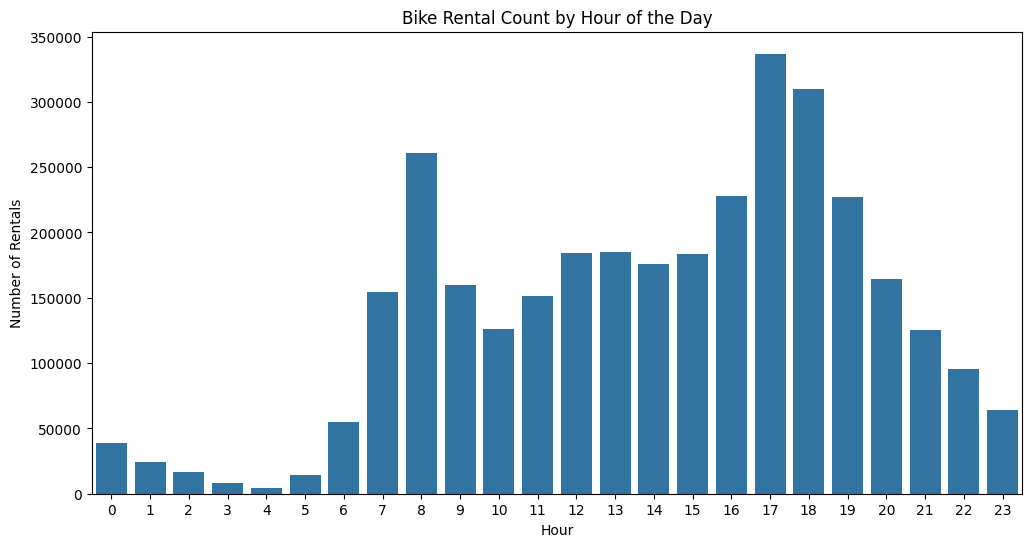

In [41]:


# Aggregate rentals by hours (could represent specific locations in time)
geo_df = hour_df.groupby('hr')['cnt'].sum().reset_index()

# Plot the data to find hotspots
plt.figure(figsize=(12, 6))
sns.barplot(x='hr', y='cnt', data=geo_df)
plt.title('Bike Rental Count by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Rentals')
plt.show()


## Visualization & Explanatory Analysis

### Pertanyaan 1: The Most Recent Day When a Customer Rented a Bike

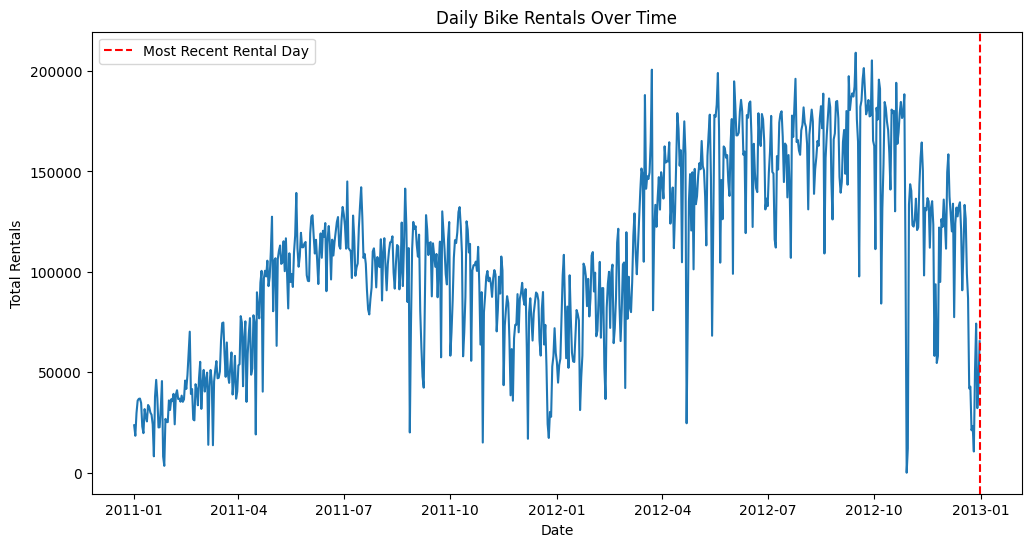

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'dteday' to datetime format
merged_df['dteday'] = pd.to_datetime(merged_df['dteday'])

# Question 1: The Most Recent Day When a Customer Rented a Bike
recent_day = merged_df.groupby('dteday')['cnt_day'].sum().reset_index()
most_recent_day = recent_day.sort_values(by='dteday', ascending=False).head(1)

most_recent_day_date = most_recent_day['dteday'].iloc[0].date()

# Visualization for Question 1
plt.figure(figsize=(12, 6))
sns.lineplot(x='dteday', y='cnt_day', data=recent_day)
plt.title('Daily Bike Rentals Over Time')
plt.xlabel('Date')
plt.ylabel('Total Rentals')
plt.axvline(x=most_recent_day['dteday'].iloc[0], color='red', linestyle='--', label='Most Recent Rental Day')
plt.legend()
plt.show()




### Pertanyaan 2: Season with the Most Rented Bikes

C:\Users\User\AppData\Local\Temp\ipykernel_11772\466787484.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='cnt_day', data=season_rentals, palette=colors)


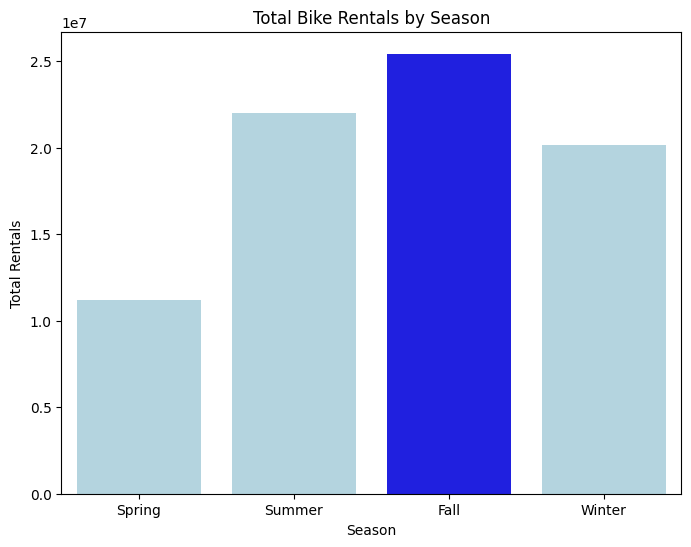

'Fall'

In [54]:
# Group by 'season' and sum the 'cnt_day' column
season_rentals = merged_df.groupby('season')['cnt_day'].sum().reset_index()

# Mapping season numbers to names
season_rentals['season'] = season_rentals['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

# Find the season with the most rentals
most_rented_season_name = season_rentals.sort_values(by='cnt_day', ascending=False).iloc[0]['season']


max_value = season_rentals['cnt_day'].max()
colors = ['blue' if value == max_value else 'lightblue' for value in season_rentals['cnt_day']]

# Visualization for Total Bike Rentals by Season
plt.figure(figsize=(8, 6))
sns.barplot(x='season', y='cnt_day', data=season_rentals, palette=colors)
plt.title('Total Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Total Rentals')
plt.show()

# Output the most recent rental day and the most rented season
most_rented_season_name

### Pertanyaan 3: How Does Weather Affect Bike Rentals?

C:\Users\User\AppData\Local\Temp\ipykernel_10996\17303971.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit_day', y='cnt_day', data=weather_rentals, palette='coolwarm')


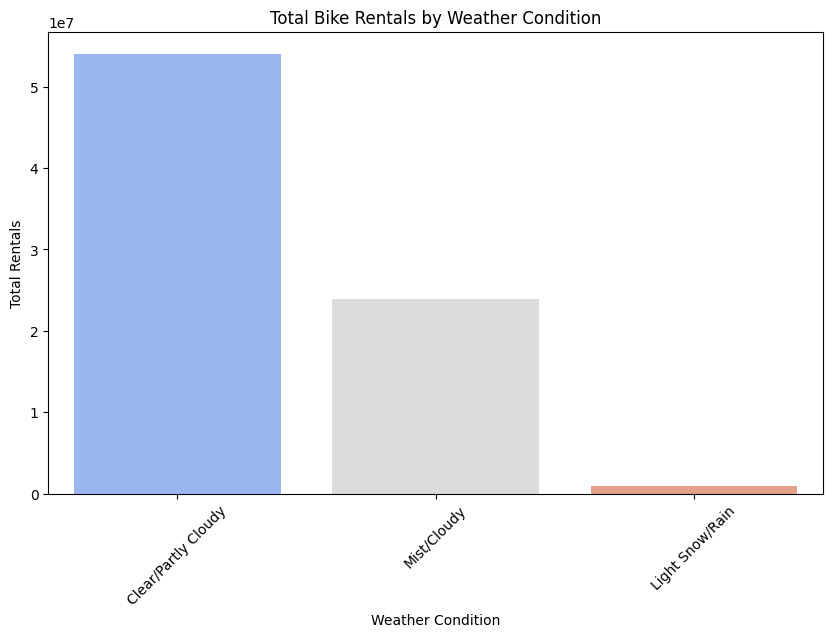

In [ ]:
# Group data by weather situation and sum the total rentals
weather_rentals = merged_df.groupby('weathersit_day')['cnt_day'].sum().reset_index()

# Mapping weather situation numbers to descriptive names
weather_rentals['weathersit_day'] = weather_rentals['weathersit_day'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Snow'
})

# Visualization: Bike Rentals by Weather Condition
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit_day', y='cnt_day', data=weather_rentals, palette='coolwarm')
plt.title('Total Bike Rentals by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Total Rentals')
plt.xticks(rotation=45)
plt.show()


## Conclusion

- The most recent bike rental occurred on December 31, 2012, marking the last day of bike rental activity in the dataset.
- The fall season experienced the highest number of bike rentals, indicating a peak in demand during this time.
- Clear or partly cloudy weather conditions lead to the highest number of bike rentals, while heavy rain or snow significantly reduces rental activity.